# Gráficas data final

In [153]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [154]:
# Load the data
df = pd.read_csv('datasets/Clientes_Dummy_Europe_Cities_Random_Final.csv')

df.head()

,ClienteID,Income,Ubicacion,HaComprado,FrecuenciaCompra,CategoríaProductoFavorito,GastoMensual,Mes,Año,Edad,...,Latitud,Longitud,Day_of_Week,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value,Cluster
0,1,31161.480791,Rome,1,3,Electrónica,354.238240,Julio,2022,53,...,41.911252,12.501644,Sunday,19,29.764254,2.607769,73.154439,0.271263,207.470986,1
1,2,30880.904610,Stockholm,1,14,Moda,247.349866,Abril,2022,55,...,59.331134,18.062440,Thursday,21,23.066846,5.692095,139.003909,0.188224,35.335695,0
2,3,24237.173142,Stockholm,1,2,Electrónica,314.977616,Noviembre,2021,28,...,59.332634,18.071068,Sunday,11,28.635921,5.626180,32.056281,0.188723,75.167011,1
3,4,22496.158034,Madrid,1,0,Libros,225.669044,Agosto,2020,50,...,40.422948,-3.704413,Sunday,20,183.229483,35.436342,37.074231,0.311976,84.954799,2
4,5,30825.113991,Paris,1,11,Electrónica,278.430570,Mayo,2020,41,...,48.857746,2.345578,Wednesday,25,24.527618,61.676897,210.712576,0.128081,92.810190,0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ClienteID                       200 non-null    int64  
 1   Income                          200 non-null    float64
 2   Ubicacion                       200 non-null    object 
 3   HaComprado                      200 non-null    int64  
 4   FrecuenciaCompra                200 non-null    int64  
 5   CategoríaProductoFavorito       200 non-null    object 
 6   GastoMensual                    200 non-null    float64
 7   Mes                             200 non-null    object 
 8   Año                             200 non-null    int64  
 9   Edad                            200 non-null    int64  
 10  TiempoEnLaPlataforma            200 non-null    int64  
 11  ValoracionesPromedio            200 non-null    float64
 12  NúmeroDevoluciones              200 

In [156]:
# Chequear por negativos

for col in df.select_dtypes('number').columns:
    print(col, (df[col] < 0).sum())

ClienteID 0
Income 0
HaComprado 0
FrecuenciaCompra 0
GastoMensual 0
Año 0
Edad 0
TiempoEnLaPlataforma 0
ValoracionesPromedio 0
NúmeroDevoluciones 0
Latitud 0
Longitud 66
Hour 0
Days_Since_Last_Purchase 0
Average_Days_Between_Purchases 0
Monthly_Spending_Std 0
Cancellation_Rate 0
Average_Transaction_Value 0
Cluster 0


In [257]:
df_city = df.groupby('Ubicacion').sum().reset_index()
df_city

C:\Users\misla\AppData\Local\Temp\ipykernel_22816\1455729970.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Ubicacion,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value,Cluster
0,Amsterdam,1293,414362.456166,12,92,4241.146818,26274,509,530,43.579047,7.251163,680.756848,63.771734,212,727.288211,370.982594,639.143991,2.164514,1336.034960,16
1,Berlin,2300,707506.879445,22,137,7401.028480,46490,1013,832,79.381390,13.375349,1207.993617,308.255240,432,1020.511979,1188.394088,1076.209137,5.104907,2443.384852,27
2,Lisbon,2065,587046.144530,19,121,5618.965527,40422,809,511,62.721624,12.049302,774.542019,-182.851175,370,1221.210625,989.921706,1300.471103,5.142562,1743.866219,14
3,London,2075,492881.741380,13,96,4762.037996,32331,607,548,56.415399,4.909302,824.112723,-1.996210,274,567.716612,777.937080,906.786433,3.135693,2202.804919,15
4,Madrid,2903,932449.828702,27,149,9638.032378,60630,1289,979,102.574061,9.779535,1212.503808,-111.130543,501,1625.905531,1201.569452,1600.662223,6.872719,3132.890620,23
5,Paris,2236,764963.527630,23,181,7498.766222,52543,1240,890,88.649504,12.413488,1270.269224,61.223802,482,1063.692740,1051.533448,1473.235050,4.734007,2645.807427,32
6,Prague,2605,619143.095893,21,104,6051.994839,42435,912,890,70.886176,7.795349,1051.545984,303.231792,322,806.418384,863.415420,1137.671320,4.385999,1362.719663,21
7,Rome,2065,697661.960688,20,119,6896.069075,44461,849,856,75.509550,11.589302,921.818345,274.907364,355,702.993010,937.923496,1006.010568,4.227755,2077.589355,23
8,Stockholm,1929,729794.990808,18,168,7328.062403,44465,997,860,76.764990,9.988372,1305.249466,397.517146,423,1121.638962,886.269521,1608.770452,5.452862,3455.188860,30
9,Vienna,629,191219.254744,7,49,2077.146425,14144,264,269,23.638691,2.758140,337.433434,114.609389,148,305.755659,315.916027,507.044281,1.674781,1018.853910,8


In [258]:
df_city[['Latitud', 'Longitud']] = df[['Latitud', 'Longitud', 'Ubicacion']].groupby('Ubicacion').mean()[['Latitud', 'Longitud']].values

In [260]:
df_city.to_csv('datasets/Data_City_Reducida_Final.csv', index=False)

In [259]:
fig = px.scatter_geo(df_city, lat='Latitud', lon='Longitud', color='GastoMensual', 
                     hover_name='Ubicacion', size=df_city['GastoMensual'] * 1000, projection='natural earth', scope= 'europe',
                     color_continuous_scale="Cividis",
                     title= 'Ventas en Europa por ciudad')

fig.show()

C:\Users\misla\AppData\Local\Temp\ipykernel_22816\3829354911.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



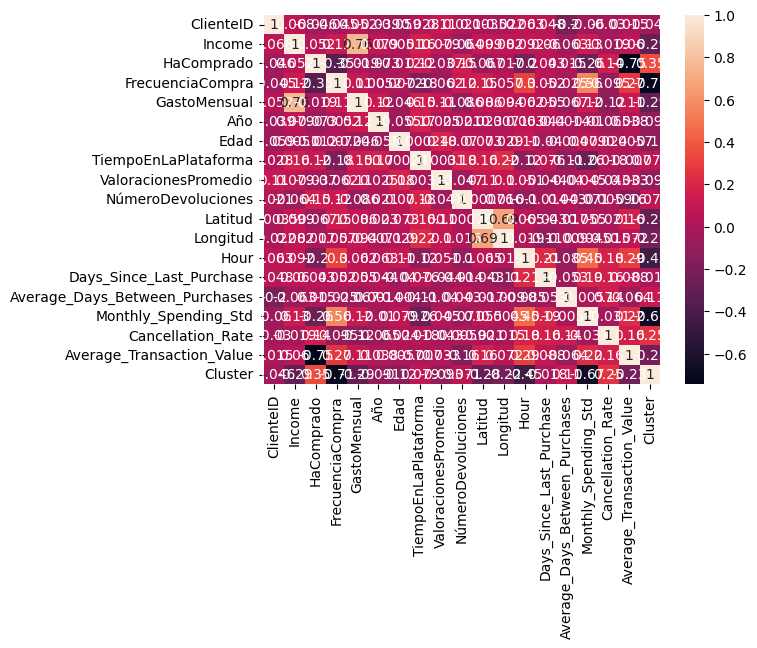

In [160]:
# Mapa de calor de correlación
sns.heatmap(df.corr(), annot=True);

In [205]:
# Me quedo con las columnas que me interesan para clusterizar
# HaComprado 
# FrecuenciaCompra 
# GastoMensual
# TiempoEnLaPlataforma 
# NúmeroDevoluciones 
# Hour 
# Days_Since_Last_Purchase 
# Average_Days_Between_Purchases
# Monthly_Spending_Std
# Cancellation_Rate
# Average_Transaction_Value

df_cluster = df[['HaComprado', 'FrecuenciaCompra', 'GastoMensual', 'TiempoEnLaPlataforma', 'NúmeroDevoluciones', 'Hour', 'Days_Since_Last_Purchase', \
                 'Average_Days_Between_Purchases', 'Monthly_Spending_Std', 'Cancellation_Rate', 'Average_Transaction_Value']]

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



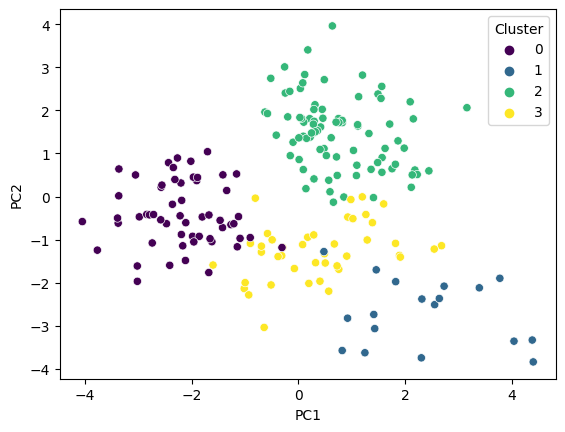

In [215]:
# Clustering con KMeans con 3 clusters, luego hacer un scatter plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=4)
scaler = StandardScaler()

# usamos variables numéricas
df.select_dtypes(include='number')

# Escalamos las variables numéricas
df_cluster = scaler.fit_transform(df.select_dtypes(include='number'))

# Entrenamos el modelo
kmeans.fit(df_cluster)

# Asignamos los clusters a cada cliente
df['Cluster'] = kmeans.labels_

# pca para reducir a 2 dimensiones
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cluster)

# Scatter plot con los clusters
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis');

In [216]:
# Sacamos la media de características por cluster
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_22816\1705896441.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
Cluster,,,,,,,,,,,,,,,,,,
0,100.678571,26454.729599,1.0,3.214286,248.718923,2020.660714,40.928571,26.142857,3.359887,0.461071,44.626497,1.117173,14.339286,45.583640,50.188714,32.878530,0.265184,86.878250
1,108.944444,29842.636207,0.0,10.500000,312.001681,2021.166667,43.000000,29.111111,3.460412,0.193023,49.279984,5.665538,22.166667,40.271229,40.847623,93.990829,0.151194,309.751130
2,102.178571,32608.777510,1.0,5.142857,333.522371,2021.190476,41.964286,50.416667,3.370078,0.526633,50.040587,10.148006,16.404762,42.555571,37.316845,33.289093,0.207451,96.100503
3,93.285714,32839.529997,1.0,9.880952,332.216215,2020.880952,45.190476,22.428571,3.490304,0.437564,47.540301,5.013445,22.357143,55.021377,45.319587,117.302098,0.188050,69.190386


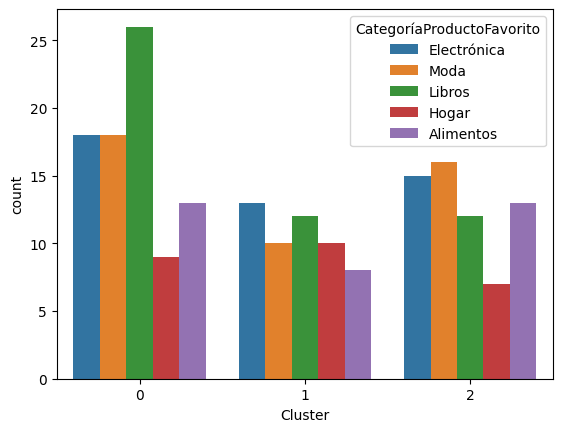

In [163]:
# Top categoría de producto favorito por cluster
df.groupby('Cluster')['CategoríaProductoFavorito'].value_counts()

# Graficamos la distribución de categorías de producto favorito por cluster
sns.countplot(data=df, x='Cluster', hue='CategoríaProductoFavorito');

In [217]:
# Visualizacion 3d de los clusters con 3 componentes principales
pca = PCA(n_components=3)

df_pca = pca.fit_transform(df_cluster)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = df['Cluster']

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster', opacity=0.7)
fig.show()

* Ha comprado
* Frecuencia compra
* Gasto mensual
* Tiempo en la plataforma - Esto lo asumimos como tiempo dado de alta en la plataforma
* Número devoluciones
* Hour
* Days_Since_Last_Purchase
* Average_Days_Between_Purchases
* Desviación Monthly Spending
* Cancellation Rate
* Average Transaction Value

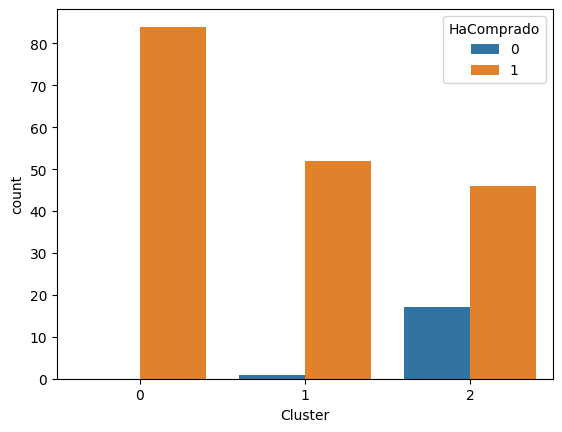

In [165]:
# Crear countplot de si ha comprado o no por cluster
sns.countplot(data=df, x='Cluster', hue='HaComprado');


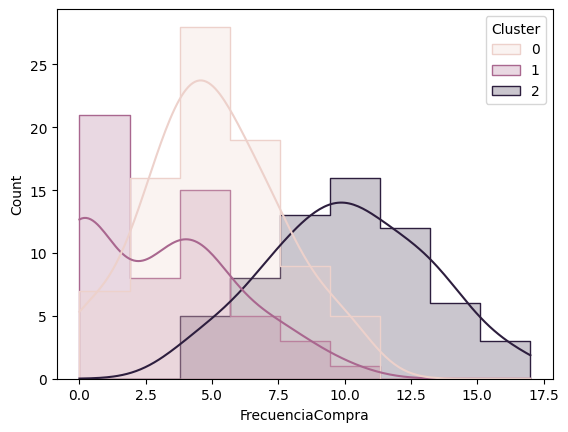

In [166]:
# Crear grafica de distribucion de frecuencia sin histograma de Frecuencia de Compra por cluster

sns.histplot(data=df, x='FrecuenciaCompra', hue='Cluster', element='step', kde=True);

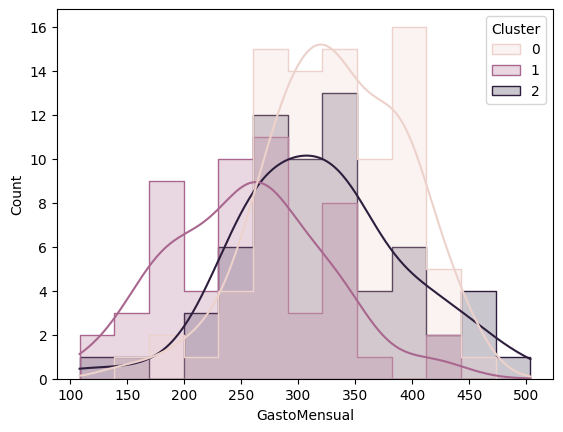

In [167]:
# Crear grafica de distribucion de frecuencia sin histograma de gastomensual por cluster
sns.histplot(data=df, x='GastoMensual', hue='Cluster', element='step', kde=True);

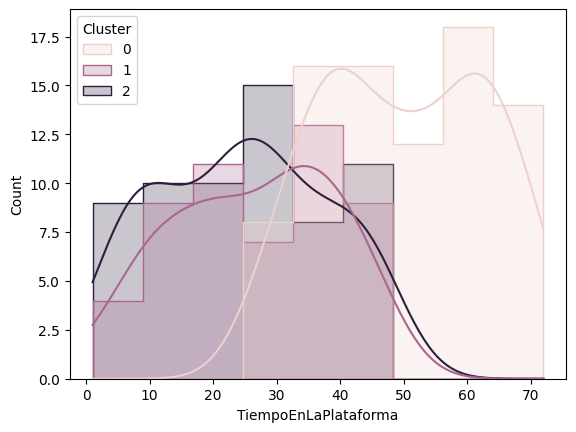

In [168]:
# Crear grafica de distribucion de frecuencia sin histograma de tiempo en la plataforma por cluster

sns.histplot(data=df, x='TiempoEnLaPlataforma', hue='Cluster', element='step', kde=True);

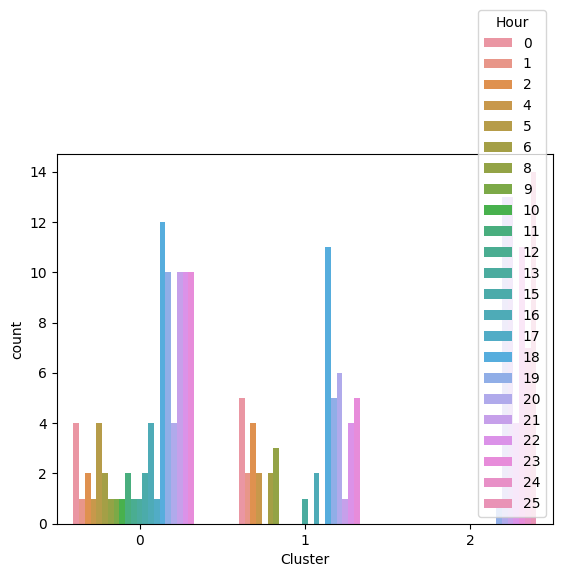

In [169]:
# Value counts de hour por cluster

df['Hour'].value_counts()

df.groupby('Cluster')['Hour'].value_counts()

# Crear countplot de hora por cluster
sns.countplot(data=df, x='Cluster', hue='Hour');

In [170]:
# Graficar la distribución de dayslastpurchase por cluster
sns.histplot(data=df, x='DaysLastPurchase', hue='Cluster', element='step', kde=True);

# Graficar la distribución de dayslastpurchase por cluster
sns.histplot(data=df, x='DaysLastPurchase', hue='Cluster', element='step', kde=True);

ValueError: Could not interpret value `DaysLastPurchase` for parameter `x`

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\py

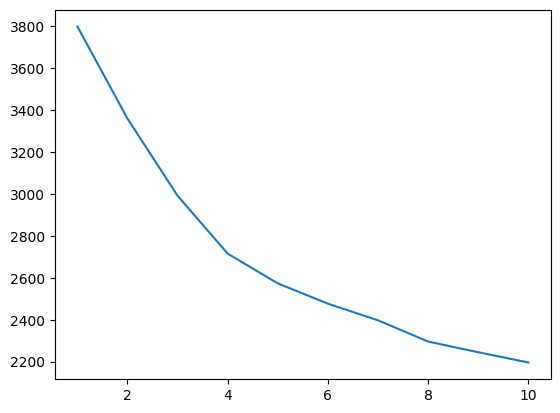

In [218]:
# Metodo del codo para determinar el número de clusters

inertia = []

for i in range(1, 11):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=inertia);

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\py

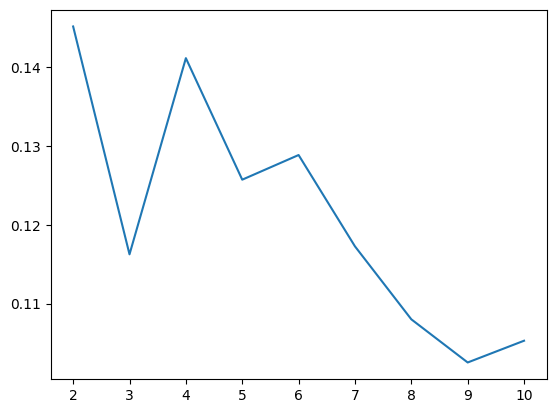

In [176]:
# Metodo de la silueta para determinar el número de clusters

from sklearn.metrics import silhouette_score

silhouette = []

for i in range(2, 11):
    
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df_scaled)
        silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

sns.lineplot(x=range(2, 11), y=silhouette);

In [261]:
df

,ClienteID,Income,Ubicacion,HaComprado,FrecuenciaCompra,CategoríaProductoFavorito,GastoMensual,Mes,Año,Edad,...,Latitud,Longitud,Day_of_Week,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value,Cluster
0,1,31161.480791,Rome,1,3,Electrónica,354.238240,Julio,2022,53,...,41.911252,12.501644,Sunday,19,29.764254,2.607769,73.154439,0.271263,207.470986,1
1,2,30880.904610,Stockholm,1,14,Moda,247.349866,Abril,2022,55,...,59.331134,18.062440,Thursday,21,23.066846,5.692095,139.003909,0.188224,35.335695,2
2,3,24237.173142,Stockholm,1,2,Electrónica,314.977616,Noviembre,2021,28,...,59.332634,18.071068,Sunday,11,28.635921,5.626180,32.056281,0.188723,75.167011,1
3,4,22496.158034,Madrid,1,0,Libros,225.669044,Agosto,2020,50,...,40.422948,-3.704413,Sunday,20,183.229483,35.436342,37.074231,0.311976,84.954799,0
4,5,30825.113991,Paris,1,11,Electrónica,278.430570,Mayo,2020,41,...,48.857746,2.345578,Wednesday,25,24.527618,61.676897,210.712576,0.128081,92.810190,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,30830.440663,Berlin,1,8,Hogar,341.746413,Septiembre,2022,25,...,52.528639,13.409293,Saturday,18,70.781393,61.569749,42.261339,0.263613,79.642799,1
196,197,24898.083764,Madrid,0,7,Electrónica,282.578068,Mayo,2020,58,...,40.392115,-3.693188,Thursday,25,23.536406,25.426559,117.751123,0.211815,282.578068,2
197,198,28654.527810,Amsterdam,1,5,Electrónica,305.755382,Enero,2020,23,...,52.358882,4.906023,Sunday,9,20.355153,6.141810,8.530414,0.006641,7.980584,1
198,199,37445.225869,Stockholm,1,8,Alimentos,324.730833,Marzo,2020,22,...,59.334092,18.062819,Tuesday,18,109.252252,15.019298,73.100675,0.383294,153.649838,1


In [ ]:
# 